In [65]:
import pandas as pd
import seaborn as sns

In [66]:
df_2020 = pd.read_csv("university_rank_2020.csv", index_col=0, sep=",", decimal=".")
df_2020 = df_2020[~df_2020.index.duplicated(keep='first')]
df_2020.head(2)

,Country,Number_students,Numb_students_per_Staff,Score_Result,Rank
University,,,,,
University of Oxford,United Kingdom,20.664,11.2,95.4,1
California Institute of Technology,United States,2.240,6.4,94.5,2


In [67]:
df_students = pd.read_excel("university_rank_students.xlsx", index_col=0, sheet_name=0)
df_students.drop_duplicates(inplace=True)
df_students.head(2)

,International_Students(%),Percentage_Female(%),Percentage_Male(%)
University,,,
University of Oxford,41.0,46.0,54.0
California Institute of Technology,30.0,NaN,66.0


In [68]:
df_other = pd.read_csv("university_rank_other.csv", index_col=0, sep=" ", decimal=".")
df_other = df_other[~df_other.index.duplicated(keep='first')]
df_other.head(2)

,Teaching,Research,Citations,Industry_Income,International_Outlook
University of Oxford,90.5,99.6,98.4,65.5,excellent
California Institute of Technology,92.1,97.2,97.9,88.0,excellent


In [69]:
df = pd.concat([df_2020, df_students, df_other], axis=1)
df.head()

,Country,Number_students,Numb_students_per_Staff,Score_Result,Rank,International_Students(%),Percentage_Female(%),Percentage_Male(%),Teaching,Research,Citations,Industry_Income,International_Outlook
University of Oxford,United Kingdom,20.664,11.2,95.4,1,41.0,46.0,54.0,90.5,99.6,98.4,65.5,excellent
California Institute of Technology,United States,2.240,6.4,94.5,2,30.0,NaN,66.0,92.1,97.2,97.9,88.0,excellent
University of Cambridge,United Kingdom,18.978,10.9,94.4,3,37.0,47.0,53.0,91.4,98.7,95.8,59.3,excellent
Stanford University,United States,16.135,7.3,94.3,4,NaN,43.0,57.0,92.8,96.4,99.9,66.2,excellent
Massachusetts Institute of Technology,United States,11.247,8.6,93.6,5,34.0,39.0,61.0,90.5,92.4,99.5,86.9,excellent


In [70]:
df.shape

(1395, 13)

In [71]:
df.head(10)

,Country,Number_students,Numb_students_per_Staff,Score_Result,Rank,International_Students(%),Percentage_Female(%),Percentage_Male(%),Teaching,Research,Citations,Industry_Income,International_Outlook
University of Oxford,United Kingdom,20.664,11.2,95.4,1,41.0,46.0,54.0,90.5,99.6,98.4,65.5,excellent
California Institute of Technology,United States,2.240,6.4,94.5,2,30.0,NaN,66.0,92.1,97.2,97.9,88.0,excellent
University of Cambridge,United Kingdom,18.978,10.9,94.4,3,37.0,47.0,53.0,91.4,98.7,95.8,59.3,excellent
Stanford University,United States,16.135,7.3,94.3,4,NaN,43.0,57.0,92.8,96.4,99.9,66.2,excellent
Massachusetts Institute of Technology,United States,11.247,8.6,93.6,5,34.0,39.0,61.0,90.5,92.4,99.5,86.9,excellent
Princeton University,United States,7.983,8.1,93.2,6,25.0,45.0,55.0,90.3,96.3,98.8,58.6,excellent
Harvard University,United States,20.823,9.2,93.0,7,24.0,49.0,51.0,89.2,98.6,99.1,47.3,excellent
Yale University,United States,12.402,5.4,91.7,8,20.0,NaN,NaN,92.0,94.8,97.3,52.4,excellent
University of Chicago,United States,13.833,5.7,90.2,9,28.0,46.0,54.0,89.1,91.4,96.7,52.7,excellent
Imperial College London,United Kingdom,16.760,11.7,89.8,10,56.0,38.0,62.0,84.5,87.6,97.0,69.9,excellent


In [72]:
df.isnull().sum()

Country                        0
Number_students                0
Numb_students_per_Staff        0
Score_Result                   0
Rank                           0
International_Students(%)    573
Percentage_Female(%)         579
Percentage_Male(%)           571
Teaching                       0
Research                       0
Citations                      0
Industry_Income                0
International_Outlook         11
dtype: int64

In [73]:
df.loc[(df['International_Outlook'].isnull()) & (df['Teaching'] > 60), 'International_Outlook'] = 'excellent'
df.loc[(df['International_Outlook'].isnull()) & (df['Teaching'] >= 20) & (df['Teaching'] <= 60), 'International_Outlook'] = 'good'
df.loc[(df['International_Outlook'].isnull()) & (df['Teaching'] < 20), 'International_Outlook'] = 'bad'
df["International_Outlook"].isnull().sum()


0

In [74]:
df["International_Students(%)"].fillna(df["International_Students(%)"].mean(), inplace=True)
df["Percentage_Female(%)"].fillna(df["Percentage_Female(%)"].mean(), inplace=True)
df["Percentage_Male(%)"].fillna(df["Percentage_Male(%)"].mean(), inplace=True)
df.isnull().sum()

Country                      0
Number_students              0
Numb_students_per_Staff      0
Score_Result                 0
Rank                         0
International_Students(%)    0
Percentage_Female(%)         0
Percentage_Male(%)           0
Teaching                     0
Research                     0
Citations                    0
Industry_Income              0
International_Outlook        0
dtype: int64

In [79]:
df["Country"].value_counts()

Country
United States     172
Japan             110
United Kingdom    100
China              80
India              56
                 ... 
Jamaica             1
Kenya               1
Uganda              1
Costa Rica          1
Georgia             1
Name: count, Length: 92, dtype: int64

In [83]:
df.loc[df["Country"] == "Slovenia"]

,Country,Number_students,Numb_students_per_Staff,Score_Result,Rank,International_Students(%),Percentage_Female(%),Percentage_Male(%),Teaching,Research,Citations,Industry_Income,International_Outlook
University of Ljubljana,Slovenia,40.110,14.7,29.5,356,6.000000,60.00000,40.000000,21.1,18.7,44.8,39.7,good
University of Maribor,Slovenia,12.124,13.6,23.0,418,13.970803,47.29902,48.895631,17.0,15.8,31.0,40.0,bad


In [90]:
df["Staff_Skills"] = (df["Teaching"] + df["Research"]) / 2
df.head(5)

,Country,Number_students,Numb_students_per_Staff,Score_Result,Rank,International_Students(%),Percentage_Female(%),Percentage_Male(%),Teaching,Research,Citations,Industry_Income,International_Outlook,Staff_Skills
University of Oxford,United Kingdom,20.664,11.2,95.4,1,41.000000,46.00000,54.0,90.5,99.6,98.4,65.5,excellent,95.05
California Institute of Technology,United States,2.240,6.4,94.5,2,30.000000,47.29902,66.0,92.1,97.2,97.9,88.0,excellent,94.65
University of Cambridge,United Kingdom,18.978,10.9,94.4,3,37.000000,47.00000,53.0,91.4,98.7,95.8,59.3,excellent,95.05
Stanford University,United States,16.135,7.3,94.3,4,13.970803,43.00000,57.0,92.8,96.4,99.9,66.2,excellent,94.60
Massachusetts Institute of Technology,United States,11.247,8.6,93.6,5,34.000000,39.00000,61.0,90.5,92.4,99.5,86.9,excellent,91.45


In [91]:
df.drop(columns=["Staff_Skills"], axis=1, inplace=True)
df.head()

,Country,Number_students,Numb_students_per_Staff,Score_Result,Rank,International_Students(%),Percentage_Female(%),Percentage_Male(%),Teaching,Research,Citations,Industry_Income,International_Outlook
University of Oxford,United Kingdom,20.664,11.2,95.4,1,41.000000,46.00000,54.0,90.5,99.6,98.4,65.5,excellent
California Institute of Technology,United States,2.240,6.4,94.5,2,30.000000,47.29902,66.0,92.1,97.2,97.9,88.0,excellent
University of Cambridge,United Kingdom,18.978,10.9,94.4,3,37.000000,47.00000,53.0,91.4,98.7,95.8,59.3,excellent
Stanford University,United States,16.135,7.3,94.3,4,13.970803,43.00000,57.0,92.8,96.4,99.9,66.2,excellent
Massachusetts Institute of Technology,United States,11.247,8.6,93.6,5,34.000000,39.00000,61.0,90.5,92.4,99.5,86.9,excellent


In [94]:
df.to_csv("university_rank.csv", sep=";", decimal=".")  

In [97]:
df_ranked = df["Rank"].sort_values(ascending=False)
df_ranked.head()

Tokyo Denki University                            535
University of Caxias do Sul                       534
Bashkir State University                          533
Pontifical Catholic University of Minas Gerais    532
Cear� State University                            531
Name: Rank, dtype: int64

<Axes: xlabel='Citations'>

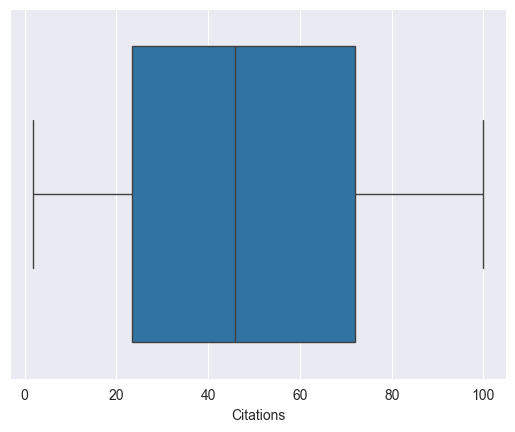

In [99]:
sns.boxplot(x=df["Citations"])

<Axes: xlabel='International_Outlook', ylabel='count'>

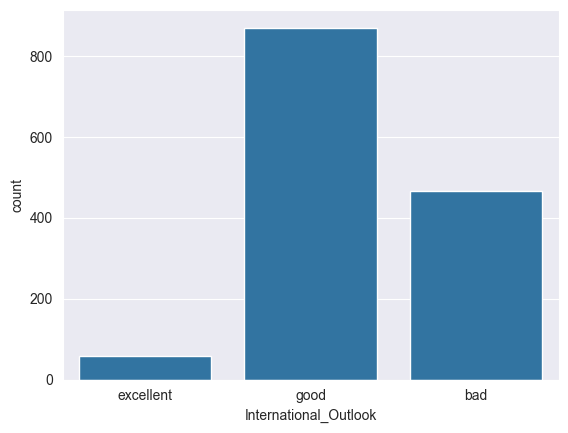

In [101]:
sns.countplot(x=df["International_Outlook"])

<Axes: xlabel='Research', ylabel='Count'>

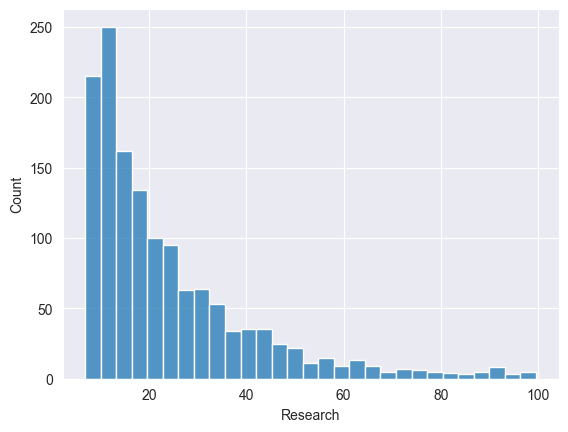

In [115]:
sns.histplot(x=df["Research"], kde=False)

<Axes: xlabel='Number_students', ylabel='Score_Result'>

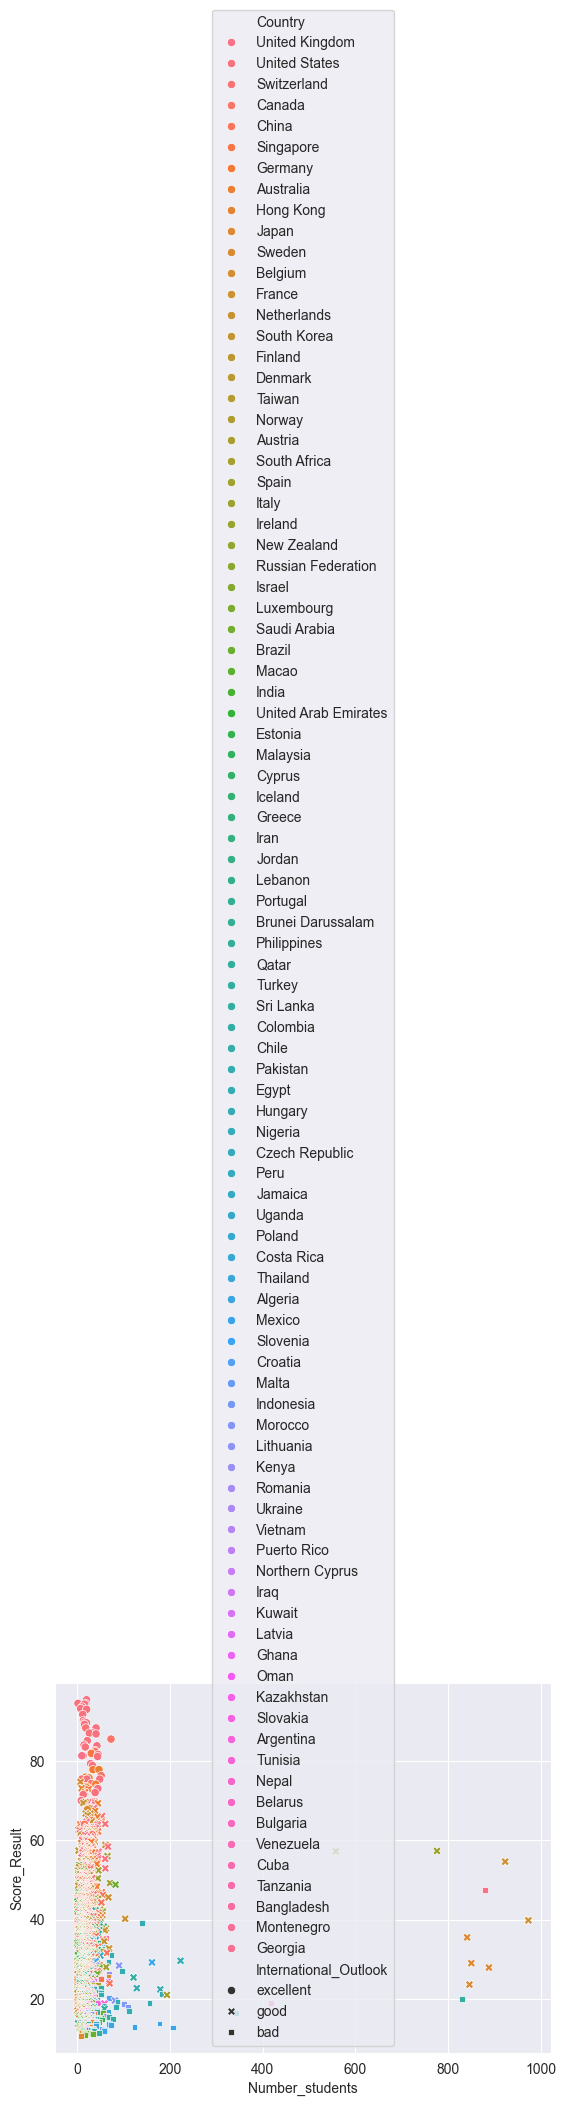

In [112]:
sns.scatterplot(x=df["Number_students"], y=df["Score_Result"], style=df["International_Outlook"], hue=df["Country"])

<Axes: xlabel='Count', ylabel='Research'>

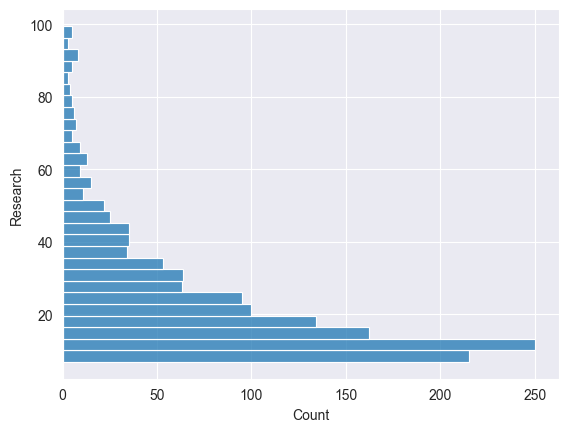

In [117]:
sns.histplot(y=df["Research"], kde=False)

<Axes: xlabel='Number_students', ylabel='Score_Result'>

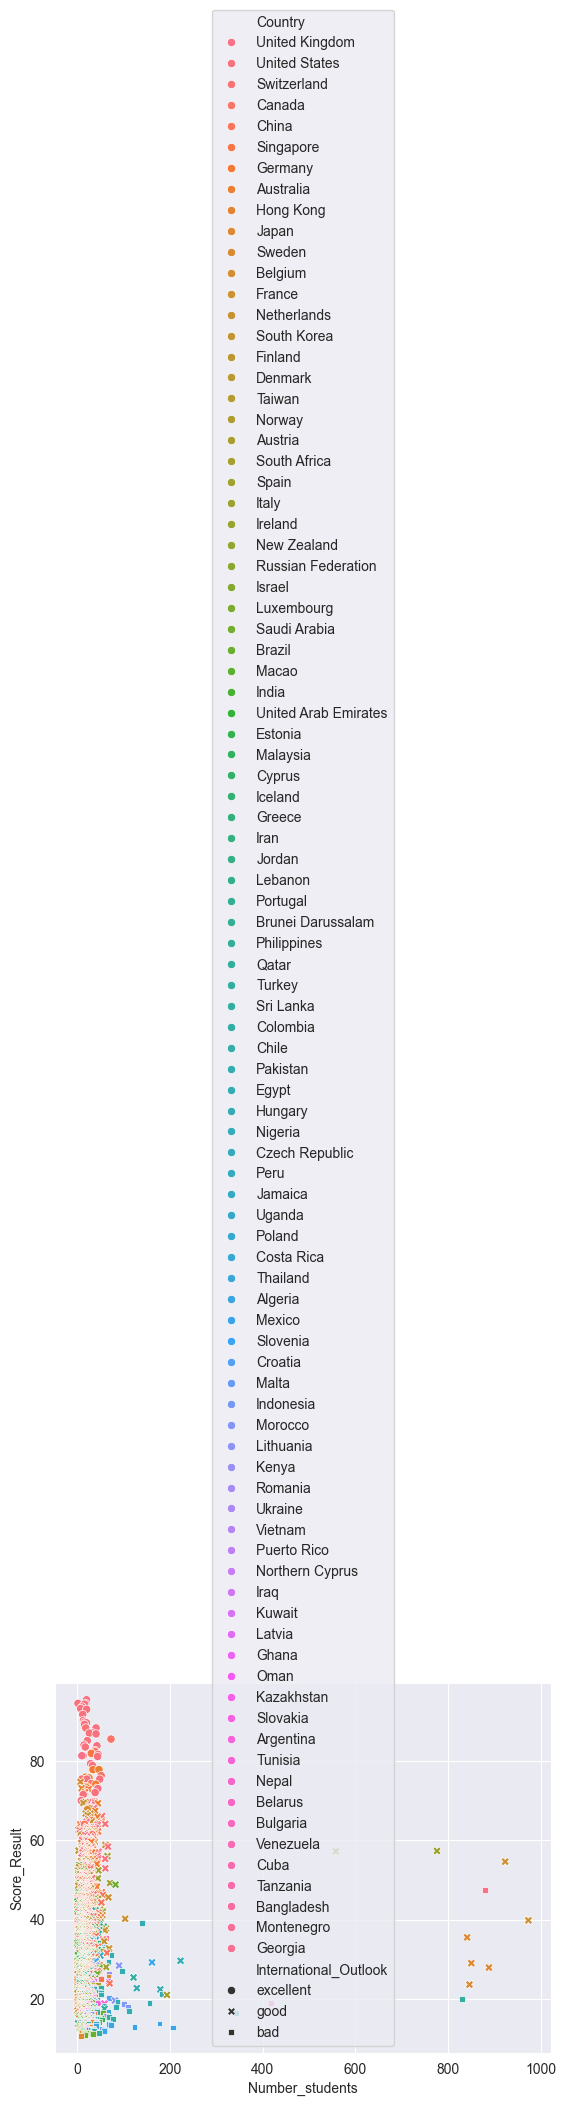

In [121]:
sns.scatterplot(data=df, x="Number_students", y="Score_Result", style="International_Outlook", hue="Country")

<Axes: >

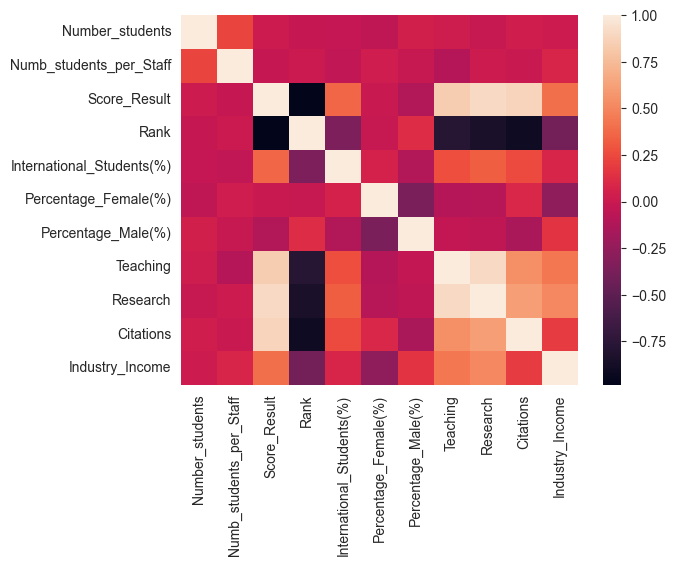

In [123]:
sns.heatmap(df.select_dtypes(include=["number"]).corr())

C:\Users\vzupanic\AppData\Local\Temp\ipykernel_16060\3814020052.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_industry, x="Industry_Income", y="Country", palette="Blues")


<Axes: xlabel='Industry_Income', ylabel='Country'>

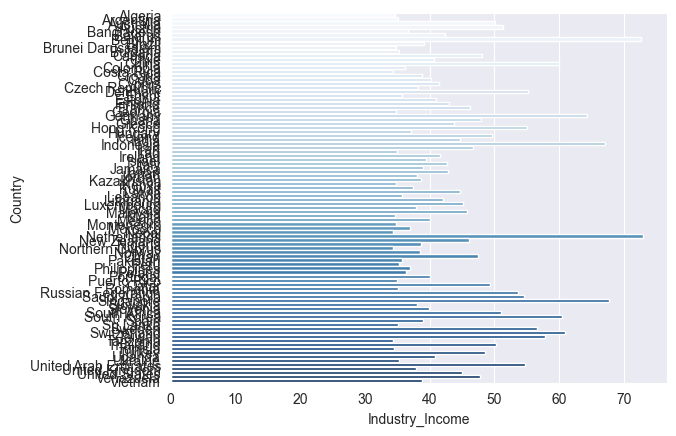

In [132]:
df_industry = df.groupby("Country")["Industry_Income"].mean().reset_index()
sns.barplot(data=df_industry, x="Industry_Income", y="Country", palette="Blues")